In [69]:
import nltk
nltk.download('punkt')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report,  recall_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow import keras
from nltk.tokenize import sent_tokenize
import random


# Set seeds to ensure reproducibility
tf.random.set_seed(2)  # TensorFlow random seed
np.random.seed(2)     # Numpy random seed
random.seed(2)        # Python random seed

data = pd.read_csv('./통합.csv', encoding = 'cp949')
selected_data = pd.concat([data[1:-5876], data[-5447: -1]])

# Split data into training and testing sets
X = selected_data['exp']
y = selected_data['integrated_category']

# Proceed with your usual preprocessing
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

max_words = len(tokenizer.index_word) + 1
# Pad sequences to ensure uniform length
max_seq_length = max(max(len(seq) for seq in X_train_seq), max(len(seq) for seq in X_val_seq)) # Change as needed based on your data
X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_length)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_seq_length)

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)

# Build CNN model
model_cnn = Sequential()
model_cnn.add(Embedding(max_words, 32, input_length=max_seq_length))
model_cnn.add(Conv1D(256, 10, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(144, activation='relu'))
model_cnn.add(Dropout(0.4))
model_cnn.add(Dense(96, activation='relu'))
model_cnn.add(Dropout(0.2))


model_cnn.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile and train the CNN model
model_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

# Train the CNN model with callbacks
model_cnn.fit(X_train_pad, y_train, epochs=100, batch_size=256, validation_data = (X_val_pad, y_val), callbacks=[early_stopping, model_checkpoint])

test_answer = pd.read_csv('test_answer.csv', encoding = 'cp949')
X_test = test_answer['exp']
y_test = test_answer['integrated_category']
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_length)

pred = model_cnn.predict(X_test_pad)
pred_new = pred.argmax(axis=1)

predicted_categories = label_encoder.inverse_transform(pred_new)

print(accuracy_score(y_test, predicted_categories))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Epoch 1/100
19/19 [==============================] - 2s 46ms/step - loss: 3.7692 - accuracy: 0.1741 - val_loss: 3.4575 - val_accuracy: 0.1934
Epoch 2/100
 5/19 [======>.......................] - ETA: 0s - loss: 3.4925 - accuracy: 0.1883

c:\Users\Administrator\anaconda3\envs\stock\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 1s 38ms/step - loss: 3.4338 - accuracy: 0.1839 - val_loss: 3.2923 - val_accuracy: 0.1934
Epoch 3/100
19/19 [==============================] - 1s 39ms/step - loss: 3.3488 - accuracy: 0.1873 - val_loss: 3.2316 - val_accuracy: 0.1934
Epoch 4/100
19/19 [==============================] - 1s 37ms/step - loss: 3.2041 - accuracy: 0.2021 - val_loss: 3.0366 - val_accuracy: 0.2125
Epoch 5/100
19/19 [==============================] - 1s 36ms/step - loss: 2.9186 - accuracy: 0.2350 - val_loss: 2.7764 - val_accuracy: 0.2645
Epoch 6/100
19/19 [==============================] - 1s 42ms/step - loss: 2.6222 - accuracy: 0.3070 - val_loss: 2.5473 - val_accuracy: 0.3487
Epoch 7/100
19/19 [==============================] - 1s 37ms/step - loss: 2.3476 - accuracy: 0.3816 - val_loss: 2.3830 - val_accuracy: 0.3755
Epoch 8/100
19/19 [==============================] - 1s 36ms/step - loss: 2.1428 - accuracy: 0.4198 - val_loss: 2.2736 - val_accuracy: 0.4328
Epoch 9/100
19/19 

In [38]:
data['integrated_category'].value_counts().sort_values()

integrated_category
4_c        6
26_b       8
4_b        8
23        12
29        12
15_a      15
13        18
30        18
6_c       19
11_z      20
17        23
11_b      25
3_a       27
11_a      27
20        28
28        35
26_z      35
2_a       36
6_b       36
5         37
27        37
2_c       38
7         39
2_z       41
19        52
4_a       61
10_b      66
18        67
1_c       68
1_z       72
15_b      81
26_a      83
3_b       84
6_a       91
14       102
24       104
8        116
1_a      124
21       136
12_a     136
1_b      150
1_d      151
16       153
22       163
2_b      174
10_a     197
11_c     215
12_b     234
9        296
31       468
25       520
100     1112
Name: count, dtype: int64

In [33]:
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPool2D
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, SimpleRNN, GRU, MaxPooling1D

# Load data
# Set seeds to ensure reproducibility
tf.random.set_seed(2)  # TensorFlow random seed
np.random.seed(2)     # Numpy random seed
random.seed(2)        # Python random seed
data = pd.read_csv('./통합.csv', encoding = 'cp949')# Replace with your data file
selected_data = pd.concat([data[1:-5876], data[-5447: -1]])

# Split data into training and testing sets
X = selected_data['exp']
y = selected_data['integrated_category']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Tokenize text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

max_words = len(tokenizer.index_word) + 1
# Pad sequences to ensure uniform length
max_seq_length = max(len(line) for line in X_val_seq) # Change as needed based on your data
X_train_pad = pad_sequences(X_train_seq, maxlen=max_seq_length)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_seq_length)

# Encode labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_val = label_encoder.transform(y_val)

# Build CNN model
model_hybrid = Sequential()
model_hybrid.add(Embedding(max_words, 32, input_length=max_seq_length))
model_hybrid.add(Conv1D(256, 5, activation='relu'))  # Adjust filter size and number as needed
model_hybrid.add(MaxPooling1D(pool_size=4))  # Adjust pooling size as needed
model_hybrid.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))  # LSTM layer after CNN
model_hybrid.add(Dense(144, activation='relu'))
model_hybrid.add(Dropout(0.4))
model_hybrid.add(Dense(96, activation='relu'))
model_hybrid.add(Dropout(0.2))
model_hybrid.add(Dense(len(label_encoder.classes_), activation='softmax'))


# Compile and train the CNN model
model_hybrid.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_lstm_model.h5', monitor='val_loss', save_best_only=True)

# Train the CNN model with callbacks
model_hybrid.fit(X_train_pad, y_train, epochs=100, batch_size=256, validation_data = (X_val_pad, y_val), callbacks=[early_stopping, model_checkpoint])

test_answer = pd.read_csv('test_answer.csv', encoding = 'cp949')
X_test = test_answer['exp']
y_test = test_answer['integrated_category']
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_seq_length)

pred = model_hybrid.predict(X_test_pad)
pred_new = pred.argmax(axis=1)

predicted_categories = label_encoder.inverse_transform(pred_new)

print(accuracy_score(y_test, predicted_categories), recall_score(y_test, predicted_categories, average='weighted'))

Epoch 1/100
19/19 [==============================] - 12s 241ms/step - loss: 3.7184 - accuracy: 0.1628 - val_loss: 3.3700 - val_accuracy: 0.1896
Epoch 2/100


c:\Users\Administrator\anaconda3\envs\stock\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


19/19 [==============================] - 4s 190ms/step - loss: 3.3862 - accuracy: 0.1830 - val_loss: 3.2946 - val_accuracy: 0.1896
Epoch 3/100
19/19 [==============================] - 3s 176ms/step - loss: 3.3179 - accuracy: 0.1857 - val_loss: 3.2222 - val_accuracy: 0.1896
Epoch 4/100
19/19 [==============================] - 3s 176ms/step - loss: 3.1905 - accuracy: 0.1866 - val_loss: 3.0460 - val_accuracy: 0.1930
Epoch 5/100
19/19 [==============================] - 3s 175ms/step - loss: 2.9287 - accuracy: 0.2198 - val_loss: 2.7637 - val_accuracy: 0.2755
Epoch 6/100
19/19 [==============================] - 3s 162ms/step - loss: 2.6464 - accuracy: 0.2770 - val_loss: 2.6229 - val_accuracy: 0.2789
Epoch 7/100
19/19 [==============================] - 3s 166ms/step - loss: 2.4315 - accuracy: 0.3126 - val_loss: 2.5130 - val_accuracy: 0.3316
Epoch 8/100
19/19 [==============================] - 3s 166ms/step - loss: 2.2381 - accuracy: 0.3732 - val_loss: 2.4680 - val_accuracy: 0.3639
Epoch 9/100

In [10]:
# Load data
tf.random.set_seed(2)
data = pd.read_csv('./통합.csv', encoding = 'cp949')# Replace with your data file

# random sampling with replacement
random_indices = np.random.choice(len(data), size=len(data), replace=True)
random_data = data.iloc[random_indices].copy()

# Split data into training and testing sets
X = random_data['exp']
y = random_data['integrated_category']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Tokenize text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_seq = tokenizer.texts_to_sequences(X_val)

max(len(line) for line in X_val_seq)
len(tokenizer.index_word)

3693

In [53]:
from sklearn.metrics import accuracy_score, f1_score

# Load data
test_answer = pd.read_csv('test_answer.csv', encoding = 'cp949')# Replace with your data file

# Extract predicted labels from df2['integrated_category']
true_categories = test_answer['integrated_category']  

# Calculate accuracy
accuracy = accuracy_score(true_categories, predicted_categories)

# Calculate F1 score
f1 = f1_score(true_categories, predicted_categories, average='weighted')  # You can choose 'macro' or 'micro' if needed

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")

Accuracy: 0.40326340326340326
F1 Score: 0.4031108286103616


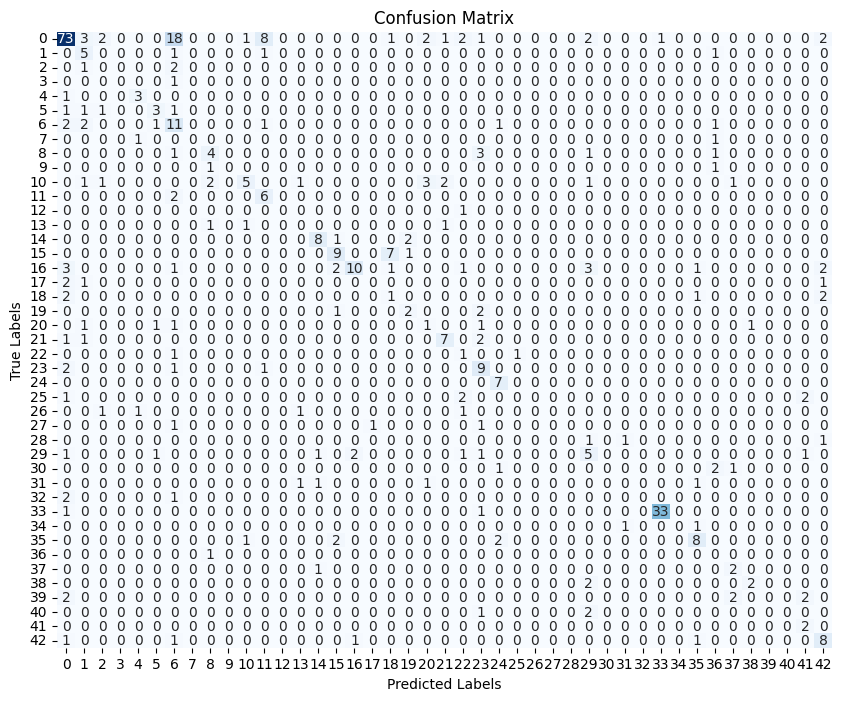

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_categories, predicted_categories)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [2]:
import pandas as pd
data = pd.read_csv('./통합.csv', encoding = 'cp949')
selected_data = pd.concat([data[1:-5876], data[-5447: -1]])
selected_data.to_csv('./통합_without_test.csv', index=False, encoding='cp949')

In [2]:
import pandas as pd
data = pd.read_csv('./통합.csv', encoding = 'cp949')
data['integrated_category'].nunique()

52

In [3]:
data['integrated_category'].unique()

array(['100', '10_a', '9', '21', '12_a', '31', '12_b', '1_a', '2_c',
       '2_b', '4_a', '8', '25', '1_d', '28', '6_c', '24', '26_a', '22',
       '26_z', '27', '30', '15_b', '6_a', '3_b', '2_z', '11_c', '14', '5',
       '1_b', '1_c', '13', '15_a', '11_a', '23', '10_b', '7', '3_a',
       '11_b', '18', '11_z', '16', '19', '2_a', '6_b', '1_z', '17', '29',
       '20', '4_b', '4_c', '26_b'], dtype=object)